### 회귀 모델
- 지도학습 : 정답데이터 필요
- 회귀 <=> 예측
- > KNN 회귀 : 분류와 동일하게 임의의 데이터의 예측값을 예측하기 위해서 K개의 이웃의 수치데이터를 바탕으로 평균을 내어 예측하는 방법
- > 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 '숫자'를 예측하는 문제
- > 주어진 문제 : petal length로 petal width 예측해보자 

### 라이브러리 불러오기 

In [80]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd

# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt  
import seaborn as sns


### 1. 데이터 로드하기

In [81]:
# iris 붓꽃 데이터 로드
from sklearn.datasets import load_iris
iris = load_iris()

print(type(iris))

<class 'sklearn.utils.Bunch'>


### 2. 데이터 탐색하기 

### 데이터 전처리
- 분류모델은 지도학습으로 **정답**이 반드시 필요함
- 학습을 위한 데이터 준비


In [82]:
print(iris.keys())

features = iris['data']
print(features[:5])

feature_names = iris['feature_names']
print(iris['target_names'])


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']


### 데이터셋을 DataFrame으로 변환
- pandas 사용 

In [83]:
type(features)   # 현재 numpy 
df = pd.DataFrame(features, columns=feature_names)
df.head()    # 상위 5개의 데이터값 반환


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Feature Data : Petal length
#### Label Data : Petal width

In [84]:
data = df.drop(columns=['sepal length (cm)', 'sepal width (cm)'])
data.head()

X = data['petal length (cm)']
y = data['petal width (cm)']


In [85]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
(150,)
(150,)


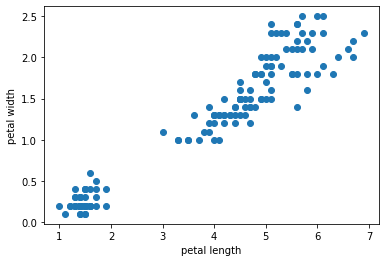

In [86]:
# 양의 상관관계 : 길이가 길수록 폭이 넓어질 것으로 예측됨 
plt.scatter(X,y)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()


### 데이터 전처리 
- train(학습) / test(검증) 데이터 분리하기
 => 일반화된 모델을 만드는 것이 주목적이므로 학습(train)/검증(test) 데이터 분리가 중요함
- 1. 학습데이터, 검증데이터 각각 특징(x)과 정답(y)으로 나눠지는 데이터를 만들기
- 2. Scikit-learn의 train_test_split 이용하여 Train/Test 데이터 분리하기
- 3. 데이터 분리 방법은 여러가지(7:3 or 8:2) => 클래스별로 분리해야함


scikit-learn 모듈 : 반드시 2차원 배열(행렬)값을 모델의 입력데이터로 사용
- 만약 1차원 배열일 경우, numpy의 reshape()함수 사용하여 변형 

In [87]:
# numpy로 변환
X = np.array(X)
y = np.array(y)


In [88]:
from sklearn.model_selection import train_test_split


In [89]:
print(X.shape)  # 특징 데이터(x)
print(y.shape)  # 정답데이터 (y)


(150,)
(150,)


In [90]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [91]:
print(x_train.shape, x_test.shape)  # 75 : 25

(112,) (38,)


In [92]:
# 여기서 -1은 무시하고(상관없고) 그 옆에 있는 숫자만 shape으로 맞춰라
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

print(x_train.shape)
print(x_test.shape)

(112, 1)
(38, 1)


### KNN 회귀 모델 생성


In [93]:
# 회귀모델 사용
from sklearn.neighbors import KNeighborsRegressor


In [94]:
# 모델 생성
knr = KNeighborsRegressor()


In [95]:
# 모델 학습
knr.fit(x_train, y_train)


KNeighborsRegressor()

In [96]:

# 모델 테스트(test 데이터 입력)
# 회귀모델에서 정확도 개념이 없음 => 결정계수(R^2 or R**2) 이용
knr.score(x_test, y_test)


0.9466315414430853

### 결정계수
- 상관계수(r), 결정계수(r^2) 설명 

In [97]:
from sklearn.metrics import mean_absolute_error


In [98]:
pred = knr.predict(x_test)  # 예측값
# 타깃(실제값)과 예측값을 입력해서 평균오차 반환
mae = mean_absolute_error(y_test, pred)

print(mae)  # 평균오차(cm)


0.14736842105263157


In [99]:
# 꽃잎의 길이가 5.1cm인 경우 폭이 얼마일지 예측 

new_data = np.array([[5.1]]) # numpy 배열(샘플 수에 특성 수를 곱한 크기로 만들기)


In [100]:
pred = knr.predict(new_data)
print(pred)

[1.84]


In [101]:
y_pred = knr.predict(x_test)

print(x_test.shape)   # 30개를 검증에 사용
print(y_pred)          # 예측 결과(수치 데이터 반환) 


(38, 1)
[1.58 0.38 2.12 1.52 1.66 0.18 1.1  1.84 1.52 1.2  1.84 0.2  0.28 0.18
 0.18 1.58 2.12 1.2  1.52 1.96 0.38 1.7  0.38 1.96 2.12 1.92 2.12 2.1
 0.2  0.38 0.24 0.18 1.42 0.38 0.28 1.64 1.52 0.18]


KNN 회귀
- 테스트하고자 하는 샘플에 근접한 훈련 데이터가 없는 경우, 즉 훈련 셋의 범위를 많이 벗어나는 샘플인 경우 정확하게 예측하기 어려움
- 선형회귀 사용 

### 선형회귀
- 특징이 하나인 경우 어떤 직선을 학습하는 알고리
- 최소제곱법(기본) / 리지, 라소
- 상관분석을 통해서 양의 상관관계, 음의 상관관계가 있을 때만 사용 


In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [103]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(new_data)


In [104]:
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))


0.9218816722386638
0.9398857910361995


직선의 방정식 =>  y=ax+b


In [105]:
print(lr.coef_, lr.intercept_)   # 직선의 방정식에서 a와 b의 값

[0.41384233] -0.36127114515039827


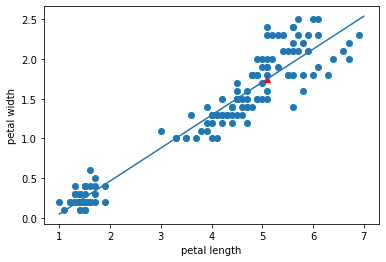

In [106]:
plt.scatter(X,y)
plt.plot([1, 7], [1*lr.coef_ + lr.intercept_, 7*lr.coef_ + lr.intercept_]) # 범위, 방정식 

plt.scatter(new_data, pred, marker='^', c='r')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()


선형회귀 : 선을 사용, 실제값과 예측값의 차이를 계산해서 평균하면 모델의 오차를 찾을 수 있음(오차가 적은 선을 최적의 선으로 사용함
<br> 
그러나, 정확한 예측이 아니고 그래프가 제 1사분면을 벗어날 경우 문제가 발생 

### 다항 회귀 
- 다항식을 사용한 선형 회귀
- 농어의 길이와 무게 데이터 

In [107]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                         21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                         23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                         27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                         39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                         44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                         556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                         850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                         1000.0])


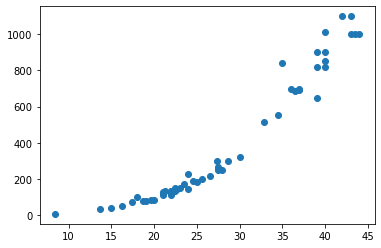

In [108]:
plt.scatter(perch_length, perch_weight)
plt.show()

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)



In [110]:
# 2차방정식 구하기 위해서 2차원 배열로 만들기 
# numpy의 column_stack 함수 : 열 방향으로 배열을 합쳐줌 

train_poly = np.column_stack((X_train**2, X_train))
test_poly = np.column_stack((X_test**2, X_test))

print(X_train.shape)
print(train_poly.shape)


(42,)
(42, 2)


In [111]:
lr = LinearRegression()
lr.fit(train_poly, y_train)


LinearRegression()

In [112]:
coef = lr.coef_
intercept = lr.intercept_
print(coef, intercept)

[  1.01433211 -21.55792498] 116.05021078278304


y = 1.014x2−21.5579x+116.05 이라는 그래프 

In [113]:
print(lr.score(train_poly, y_train))  # 0.9706807451768623
print(lr.score(test_poly, y_test))

0.9706807451768623
0.9775935108325122


In [114]:
# 길이가 40인 농어의 무게를 예측하기 
### * 훈련과정과 동일하게 길이의 제곱을 함께 넣어주어야한다 ###
print(lr.predict([[40**2, 40]]))  

# 예측한 무게 : 876


[876.66458663]


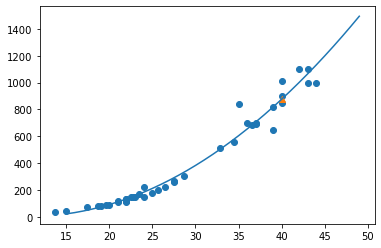

In [115]:
point = np.arange(15, 50)  # x값의 범위 설정 

plt.scatter(X_train, y_train)
plt.plot(point, coef[0]*point**2 + coef[1]*point + intercept)  # 방정식 그리기 : y = ax**2 + bx + c 


plt.scatter([40], [876], marker='^')
plt.show()
